### (i) Apply Decision tree, Naive Bayes classifiers and Random Forest to detect the
### target as yes or no (for bank data) and to detect the diabetes as yes or no (for diabetes
### data) using the following data sets. (40M)
### https://www.kaggle.com/datasets/krantiswalke/bankfullcsv
### https://www.kaggle.com/datasets/shashankvichare/diabetes-prediction
### (ii) Test the algorithm's performance on the following test datasets.
### Test Datasets:
### (a) bank-test.xls
### (b) diabetes-test.xls

=== Decision Tree ===
Accuracy: 0.8912971359062258
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.57      0.40      0.47      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043


Confusion Matrix:
[[7622  330]
 [ 653  438]]
=== Naïve Bayes ===
Accuracy: 0.8248368904124738
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      7952
           1       0.34      0.49      0.40      1091

    accuracy                           0.82      9043
   macro avg       0.63      0.68      0.65      9043
weighted avg       0.86      0.82      0.84      9043


Confusion Matrix:
[[6922 1030]
 [ 554  537]]
=== Random Forest ===
Accuracy: 0.9020236647130377
Classification Report:
               precision    reca

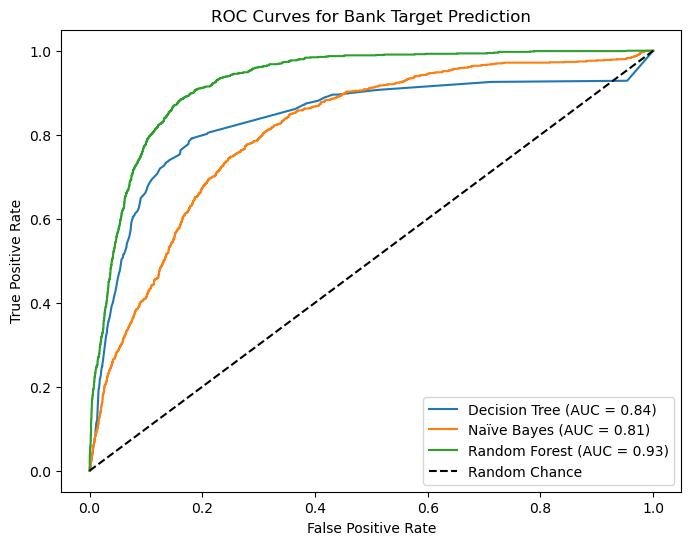

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
df = pd.read_csv("bank-full.csv") 

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Target']) 
y = df['Target'] 


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ------------------------------
# Decision Tree Classifier
# ------------------------------
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=10, 
                            max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, 
                            random_state=None, splitter='best')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))
cm = confusion_matrix(y_test, dt_pred)
print("\nConfusion Matrix:")
print(cm)

# ------------------------------
# Naïve Bayes Classifier
# ------------------------------
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print("=== Naïve Bayes ===")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))
cm = confusion_matrix(y_test, nb_pred)
print("\nConfusion Matrix:")
print(cm)
# ------------------------------
# Random Forest Classifier
# ------------------------------
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
                            max_depth=20, max_features='sqrt', max_leaf_nodes=None, max_samples=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, 
                            min_weight_fraction_leaf=0.0, n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
cm = confusion_matrix(y_test, rf_pred)
print("\nConfusion Matrix:")
print(cm)

# ------------------------------
# Compute ROC Curves and AUC for Each Model
# ------------------------------

dt_probs = dt.predict_proba(X_test)[:, 1]  
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

nb_probs = nb.predict_proba(X_test)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

rf_probs = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)


plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naïve Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Bank Target Prediction')
plt.legend(loc='lower right')
plt.show()


In [7]:
import pandas as pd

# Load test dataset
test_df = pd.read_excel("bank-test.xlsx", header=4)
test_df = test_df.iloc[1:]  # Skip first row after the header
test_df = test_df.drop(test_df.columns[0], axis=1)  # Drop first unnamed column

# Convert all columns to lowercase strings
for col in test_df.columns:
    test_df[col] = test_df[col].astype(str).str.lower()

# Map month names to their short forms
month_map = {
    "january": "jan", "february": "feb", "march": "mar", "april": "apr",
    "may": "may", "june": "jun", "july": "jul", "august": "aug",
    "september": "sep", "october": "oct", "november": "nov", "december": "dec"
}
test_df["month"] = test_df["month"].str.strip().str.lower().replace(month_map)

# Encode categorical features
for col in categorical_cols[:-1]:  # Exclude 'Target' since it's not in test data
    if col in test_df.columns:
        test_df[col] = label_encoders[col].transform(test_df[col])

# Scale the test features
test_X_scaled = scaler.transform(test_df)

# Generate predictions
test_df["Decision Tree Prediction"] = np.where(dt.predict(test_X_scaled) == 0, "No", "Yes")
test_df["Naïve Bayes Prediction"] = np.where(nb.predict(test_X_scaled) == 0, "No", "Yes")
test_df["Random Forest Prediction"] = np.where(rf.predict(test_X_scaled) == 0, "No", "Yes")
# Show final DataFrame
test_df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Decision Tree Prediction,Naïve Bayes Prediction,Random Forest Prediction
1,40.0,0,2,1,0,1303.0,1,1,0,6.0,4,1585.0,8.0,405.0,405.0,2,No,Yes,Yes
2,66.0,1,1,2,1,50775.0,0,0,2,21.0,9,646.0,22.0,94.0,94.0,0,No,Yes,No
3,50.0,2,2,0,0,24161.0,1,0,1,25.0,2,1395.0,49.0,414.0,414.0,1,Yes,Yes,Yes
4,72.0,3,0,3,1,-134.0,1,1,2,20.0,9,381.0,30.0,576.0,576.0,2,Yes,Yes,Yes
5,61.0,4,1,2,0,-1382.0,0,0,0,23.0,6,1096.0,52.0,257.0,257.0,0,Yes,Yes,No
6,77.0,5,1,1,1,68792.0,0,1,0,28.0,8,653.0,54.0,498.0,498.0,2,No,Yes,Yes
7,44.0,6,0,1,1,864.0,1,1,1,2.0,9,590.0,45.0,30.0,30.0,0,No,No,No
8,38.0,7,1,2,0,23208.0,0,1,2,2.0,4,924.0,40.0,84.0,84.0,3,No,No,No
9,26.0,8,2,3,0,2263.0,1,0,0,27.0,2,1379.0,50.0,69.0,69.0,1,Yes,No,Yes
10,84.0,9,0,2,0,28385.0,0,0,1,5.0,5,633.0,8.0,488.0,488.0,2,Yes,Yes,Yes


----- Decision Tree Classifier -----
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        64
           1       0.51      0.58      0.55        36

    accuracy                           0.65       100
   macro avg       0.63      0.64      0.63       100
weighted avg       0.66      0.65      0.65       100

Confusion Matrix:
 [[44 20]
 [15 21]]

----- Gaussian Naive Bayes Classifier -----
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75        64
           1       0.56      0.64      0.60        36

    accuracy                           0.69       100
   macro avg       0.67      0.68      0.67       100
weighted avg       0.70      0.69      0.69       100

Confusion Matrix:
 [[46 18]
 [13 23]]

----- Random Forest Classifier -----
Accuracy: 0.76
Classification Report:
               precision    recall

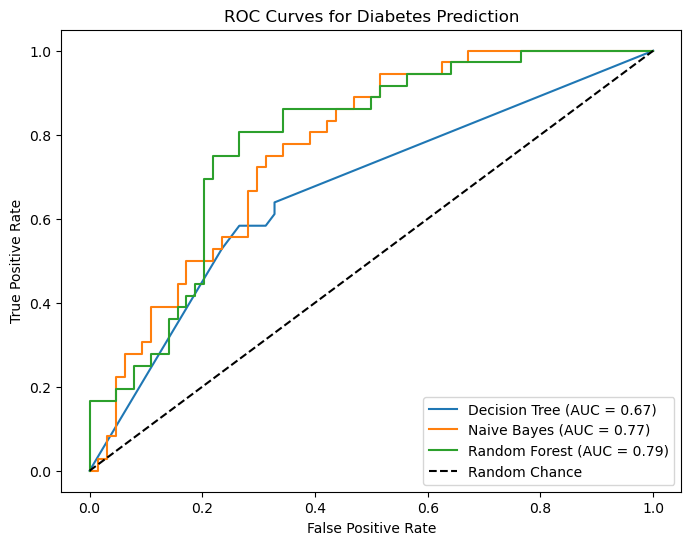

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             roc_curve, auc)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

df = pd.read_csv("Diabetespred.csv")
df.fillna(df.median(), inplace=True)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# ------------------------------
# Decision Tree Classifier
# ------------------------------
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
dt_model.fit(X_train_res, y_train_res)
y_pred_dt = dt_model.predict(X_test_scaled)

print("----- Decision Tree Classifier -----")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# ------------------------------
# Gaussian Naive Bayes Classifier
# ------------------------------
nb_model = GaussianNB(var_smoothing=1e-09)
nb_model.fit(X_train_res, y_train_res)
y_pred_nb = nb_model.predict(X_test_scaled)

print("\n----- Gaussian Naive Bayes Classifier -----")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# ------------------------------
# Random Forest Classifier
# ------------------------------
rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=1,
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\n----- Random Forest Classifier -----")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ------------------------------
# ROC Curve and AUC for Each Classifier
# ------------------------------

dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]  # probabilities for class 1
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

nb_probs = nb_model.predict_proba(X_test_scaled)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Diabetes Prediction')
plt.legend(loc='lower right')
plt.show()


In [12]:

test_df = pd.read_excel("diabetes-test.xlsx", header=5)
test_df = test_df.iloc[1:] 
test_df = test_df.drop(test_df.columns[0], axis=1)  

test_df = test_df.apply(pd.to_numeric, errors='coerce')

test_df.fillna(test_df.median(), inplace=True)

test_X_scaled = scaler.transform(test_df)


test_df["Decision Tree Prediction"] = np.where(dt_model.predict(test_X_scaled) == 0, "No", "Yes")
test_df["Naïve Bayes Prediction"] = np.where(nb_model.predict(test_X_scaled) == 0, "No", "Yes")
test_df["Random Forest Prediction"] = np.where(rf_model.predict(test_X_scaled) == 0, "No", "Yes")

test_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Decision Tree Prediction,Naïve Bayes Prediction,Random Forest Prediction
1,12.0,49.0,56.0,18.0,331.0,50.0,0.192313,21.0,No,Yes,No
2,4.0,128.0,39.0,53.0,367.0,22.0,0.411382,21.0,Yes,Yes,No
3,15.0,95.0,113.0,40.0,494.0,27.0,0.780781,48.0,Yes,Yes,Yes
4,12.0,77.0,37.0,9.0,193.0,23.0,0.392337,55.0,No,No,No
5,9.0,53.0,83.0,6.0,481.0,24.0,0.861166,63.0,No,Yes,No
6,1.0,96.0,30.0,37.0,473.0,18.0,1.438416,32.0,No,Yes,No
7,4.0,148.0,103.0,49.0,405.0,40.0,1.251075,42.0,Yes,Yes,Yes
8,11.0,120.0,86.0,47.0,450.0,24.0,1.217705,37.0,Yes,Yes,Yes
9,12.0,143.0,88.0,15.0,266.0,29.0,0.833595,60.0,No,Yes,Yes
10,3.0,102.0,114.0,27.0,453.0,28.0,1.709989,70.0,No,Yes,No


## Apply Decision tree for the California Housing Dataset to predict the house price and
## plot it.
## https://www.geeksforgeeks.org/dataset-for-linear-regression/
## Note: Exclude “longitude, latitude and ocean proximity” parameters/variables.
## Compute the price for the “housing2” test data using the trained Decision tree.

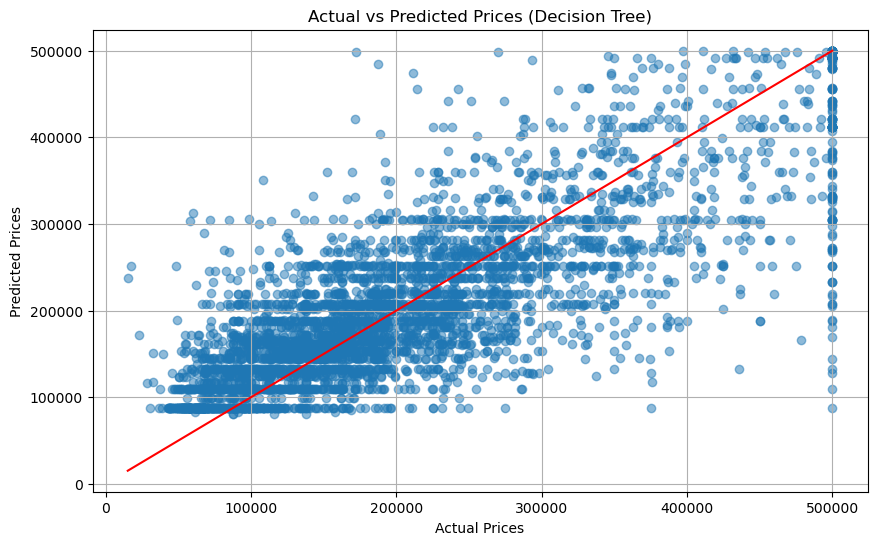

Mean Absolute Error (MAE): 50022.68
Mean Squared Error (MSE): 4857231631.10
Root Mean Squared Error (RMSE): 69693.84
R-squared Score (R²): 0.6293

Test Data with Predictions:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,Predicted_Price
0,20.0,8.322151,302.0,999.0,302.0,2.052905,13.619205,0.073426,3.307947,296684.210526
1,10.0,8.966739,645.0,2307.0,265.0,1.113829,29.573585,0.082302,8.705660,245533.444444
2,63.0,9.068546,619.0,1659.0,227.0,2.254161,38.224670,0.071338,7.308370,438157.285714
3,46.0,8.230844,984.0,607.0,334.0,2.034758,11.239521,0.262120,1.817365,479654.915663
4,10.0,8.366835,578.0,653.0,391.0,1.886660,11.000000,0.134387,1.670077,314410.100000
5,23.0,8.307213,458.0,1458.0,285.0,2.047719,14.217544,0.113031,5.115789,296684.210526
6,9.0,9.179159,791.0,1472.0,369.0,1.840661,26.265583,0.081614,3.989160,192886.440678
7,42.0,8.434464,916.0,657.0,353.0,2.180508,13.036827,0.199044,1.861190,491122.459459
8,5.0,8.865594,101.0,1289.0,383.0,2.241029,18.493473,0.014259,3.365535,472050.500000
9,33.0,8.603554,404.0,980.0,481.0,1.550325,11.330561,0.074128,2.037422,480200.250000


In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

housing_data = pd.read_csv('housing.csv')
housing_data = housing_data.drop(['longitude', 'latitude', 'ocean_proximity'], axis=1)

housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)
housing_data['rooms_per_household'] = housing_data['total_rooms'] / housing_data['households']
housing_data['bedrooms_per_room'] = housing_data['total_bedrooms'] / housing_data['total_rooms']
housing_data['population_per_household'] = housing_data['population'] / housing_data['households']

housing_data['median_income'] = np.log1p(housing_data['median_income'])
housing_data['total_rooms'] = np.log1p(housing_data['total_rooms'])

X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(max_depth=8, min_samples_split=10, min_samples_leaf=4, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Decision Tree)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.grid(True)
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")

housing_test_data = pd.read_csv("housing2.csv", skiprows=2)
housing_test_data = housing_test_data.drop(housing_test_data.columns[0], axis=1)
housing_test_data = housing_test_data.drop(index=housing_test_data.index[0]).reset_index(drop=True)
expected_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
housing_test_data = housing_test_data[expected_columns]

housing_test_data['total_bedrooms'].fillna(housing_test_data['total_bedrooms'].median(), inplace=True)

housing_test_data['rooms_per_household'] = housing_test_data['total_rooms'] / housing_test_data['households']
housing_test_data['bedrooms_per_room'] = housing_test_data['total_bedrooms'] / housing_test_data['total_rooms']
housing_test_data['population_per_household'] = housing_test_data['population'] / housing_test_data['households']


housing_test_data['median_income'] = np.log1p(housing_test_data['median_income'])

housing_test_data['total_rooms'] = np.log1p(housing_test_data['total_rooms'])

housing_test_data_poly = poly.transform(housing_test_data)

housing_test_data_scaled = scaler.transform(housing_test_data_poly)

housing_test_predictions = dt_model.predict(housing_test_data_scaled)
housing_test_data['Predicted_Price'] = housing_test_predictions

print("\nTest Data with Predictions:")
housing_test_data


# Perform SVM and Bayes classifiers on the following data to predict credit card fraud.(20M)
# https://www.kaggle.com/datasets/nishipatkar/credit-card-details
# (a) Predict credit card fraud for the test data: creditcard-test.xls

Class distribution in dataset before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.67      0.73        98

    accuracy                           1.00     56962
   macro avg       0.90      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962



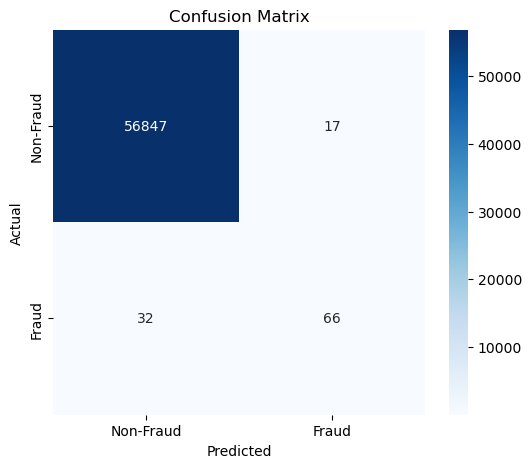

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

df = pd.read_csv("creditcard.csv")
print("Class distribution in dataset before SMOTE:")
print(df['Class'].value_counts())

X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy=0.1,random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

svm_model = SVC(kernel='rbf', C=10, gamma='auto', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test)

print("Updated Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [2]:
test_df = pd.read_excel("creditcard-test.xlsx", header=3)
test_df = test_df.iloc[1:].reset_index(drop=True)
test_df = test_df.drop(test_df.columns[0], axis=1)
test_df = test_df.apply(pd.to_numeric, errors='coerce')

X_test_new = scaler.transform(test_df)
y_test_pred = svm_model.predict(X_test_new)
test_df['Predicted Class'] = y_test_pred

test_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Predicted Class
0,11707.0,7.28,-0.53,8.17,9.32,1.11,0.53,-0.43,9.69,9.72,...,6.07,1.13,0.46,9.82,3.30,5.07,-0.71,-0.91,958.184120,0
1,75775.0,0.76,5.92,-0.69,-0.49,7.88,1.13,6.90,3.62,0.00,...,3.35,0.10,5.18,1.85,4.39,-0.24,8.38,8.82,822.209306,0
2,50010.0,-0.92,7.57,6.30,2.68,2.93,0.32,5.06,0.15,5.29,...,6.11,5.35,7.84,7.02,-0.73,2.97,2.22,5.75,61.662134,0
3,11996.0,4.00,1.22,0.65,4.29,7.33,-0.45,1.19,1.57,7.58,...,4.94,0.20,3.60,2.41,3.28,8.67,6.05,5.99,956.869145,0
4,3360.0,8.60,6.43,-0.34,10.00,0.36,7.91,4.96,8.80,3.94,...,4.96,6.72,9.73,8.07,0.11,8.31,9.96,7.78,159.284273,0
5,71278.0,2.63,-0.31,3.91,1.75,-0.12,0.89,8.17,1.13,5.53,...,7.10,8.75,5.97,-0.26,9.98,5.18,2.07,1.04,282.008097,0
6,15904.0,8.27,4.01,6.60,8.61,6.04,9.74,6.60,3.67,9.28,...,8.75,6.50,9.99,3.69,3.92,8.26,-0.66,6.67,109.150863,0
7,47645.0,7.86,2.27,0.87,9.47,6.45,-0.12,1.41,0.68,8.83,...,2.65,5.60,2.94,4.44,4.70,9.25,2.96,-0.68,839.448067,0
8,40430.0,0.27,1.17,5.53,4.90,9.94,7.12,6.69,6.89,3.64,...,5.44,5.75,-0.20,9.61,7.96,-0.52,-0.71,3.52,120.055819,0
9,14347.0,1.85,9.79,0.96,0.00,8.24,2.39,0.28,8.34,9.68,...,1.87,4.88,9.15,2.60,2.51,-0.89,3.61,-0.93,201.238715,0


Class distribution in dataset before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64
Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.88      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962



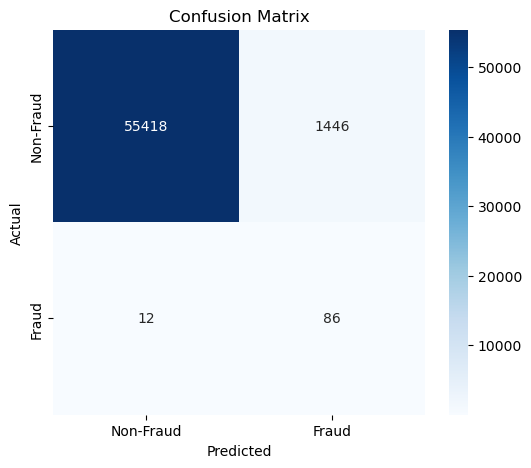

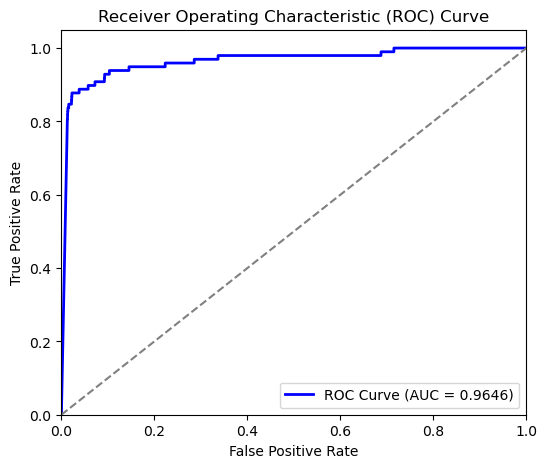

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Predicted Class
0,11707.0,7.28,-0.53,8.17,9.32,1.11,0.53,-0.43,9.69,9.72,...,6.07,1.13,0.46,9.82,3.30,5.07,-0.71,-0.91,958.184120,1
1,75775.0,0.76,5.92,-0.69,-0.49,7.88,1.13,6.90,3.62,0.00,...,3.35,0.10,5.18,1.85,4.39,-0.24,8.38,8.82,822.209306,1
2,50010.0,-0.92,7.57,6.30,2.68,2.93,0.32,5.06,0.15,5.29,...,6.11,5.35,7.84,7.02,-0.73,2.97,2.22,5.75,61.662134,1
3,11996.0,4.00,1.22,0.65,4.29,7.33,-0.45,1.19,1.57,7.58,...,4.94,0.20,3.60,2.41,3.28,8.67,6.05,5.99,956.869145,1
4,3360.0,8.60,6.43,-0.34,10.00,0.36,7.91,4.96,8.80,3.94,...,4.96,6.72,9.73,8.07,0.11,8.31,9.96,7.78,159.284273,1
5,71278.0,2.63,-0.31,3.91,1.75,-0.12,0.89,8.17,1.13,5.53,...,7.10,8.75,5.97,-0.26,9.98,5.18,2.07,1.04,282.008097,1
6,15904.0,8.27,4.01,6.60,8.61,6.04,9.74,6.60,3.67,9.28,...,8.75,6.50,9.99,3.69,3.92,8.26,-0.66,6.67,109.150863,1
7,47645.0,7.86,2.27,0.87,9.47,6.45,-0.12,1.41,0.68,8.83,...,2.65,5.60,2.94,4.44,4.70,9.25,2.96,-0.68,839.448067,1
8,40430.0,0.27,1.17,5.53,4.90,9.94,7.12,6.69,6.89,3.64,...,5.44,5.75,-0.20,9.61,7.96,-0.52,-0.71,3.52,120.055819,1
9,14347.0,1.85,9.79,0.96,0.00,8.24,2.39,0.28,8.34,9.68,...,1.87,4.88,9.15,2.60,2.51,-0.89,3.61,-0.93,201.238715,1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE


df = pd.read_csv("creditcard.csv")
print("Class distribution in dataset before SMOTE:")
print(df['Class'].value_counts())

X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1] 

print("Updated Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

test_df = pd.read_excel("creditcard-test.xlsx", header=3)
test_df = test_df.iloc[1:].reset_index(drop=True)
test_df = test_df.drop(test_df.columns[0], axis=1)
test_df = test_df.apply(pd.to_numeric, errors='coerce')

X_test_new = scaler.transform(test_df)
y_test_pred = nb_model.predict(X_test_new)
test_df['Predicted Class'] = y_test_pred

test_df


### Perform KNN Classification to detect the diabetes as yes or no (for diabetes data) and
### to classify the flower type (for flower data) using the following data sets. (30M)
### https://www.kaggle.com/datasets/shashankvichare/diabetes-prediction
### https://www.kaggle.com/datasets/arshid/iris-flower-dataset
### (a) diabetes-test.xls
### (b) flower-test.xls


Test Set Accuracy: 80.00%

Confusion Matrix:
[[53 11]
 [ 9 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        64
           1       0.71      0.75      0.73        36

    accuracy                           0.80       100
   macro avg       0.78      0.79      0.79       100
weighted avg       0.80      0.80      0.80       100



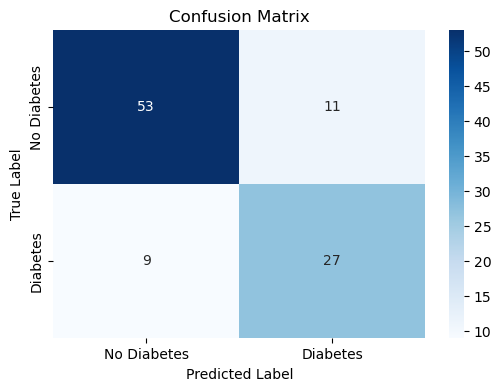

ROC AUC Score: 0.84


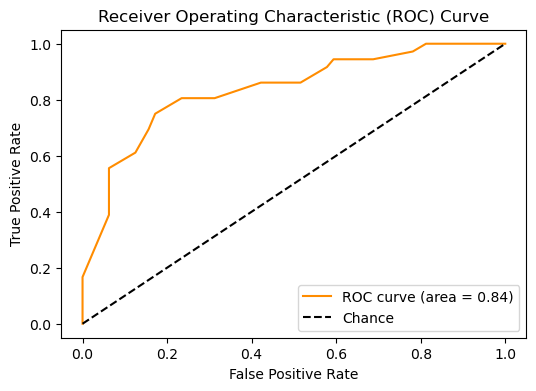


Predicted Diabetes Outcomes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted_Outcome
1,12.0,49.0,56.0,18.0,331.0,50.0,0.192313,21.0,No
2,4.0,128.0,39.0,53.0,367.0,22.0,0.411382,21.0,Yes
3,15.0,95.0,113.0,40.0,494.0,27.0,0.780781,48.0,Yes
4,12.0,77.0,37.0,9.0,193.0,23.0,0.392337,55.0,No
5,9.0,53.0,83.0,6.0,481.0,24.0,0.861166,63.0,Yes
6,1.0,96.0,30.0,37.0,473.0,18.0,1.438416,32.0,No
7,4.0,148.0,103.0,49.0,405.0,40.0,1.251075,42.0,Yes
8,11.0,120.0,86.0,47.0,450.0,24.0,1.217705,37.0,Yes
9,12.0,143.0,88.0,15.0,266.0,29.0,0.833595,60.0,Yes
10,3.0,102.0,114.0,27.0,453.0,28.0,1.709989,70.0,Yes


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE

diabetes_df = pd.read_csv("Diabetespred.csv")

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=25, p=2, weights='uniform')
knn.fit(X_train_scaled, y_train_smote)


y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy: {:.2f}%".format(accuracy * 100))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score: {:.2f}".format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


test_df = pd.read_excel("diabetes-test.xlsx", header=5)
test_df = test_df.iloc[1:]
test_df = test_df.drop(test_df.columns[0], axis=1)


test_df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


test_df_scaled = scaler.transform(test_df)

test_predictions = knn.predict(test_df_scaled)

test_df['Predicted_Outcome'] = np.where(test_predictions == 0, "No", "Yes")
print("\nPredicted Diabetes Outcomes:")
test_df

Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



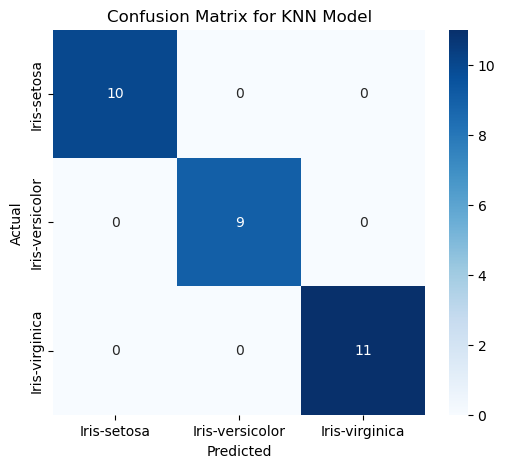

======Predictions=====


,sepal_length,sepal_width,petal_length,petal_width,Predicted_Species
1,6.4882,3.4127,6.1458,1.0739,Iris-versicolor
2,6.1154,3.2755,3.8060,0.2730,Iris-versicolor
3,6.7766,2.6693,2.9153,1.8620,Iris-versicolor
4,4.2439,3.7411,6.1605,2.0016,Iris-versicolor
5,5.7619,3.7088,2.2250,1.9717,Iris-versicolor
6,4.3800,3.2337,4.1747,0.5083,Iris-setosa
7,7.4658,3.2460,1.4442,0.9018,Iris-versicolor
8,4.7213,3.2989,6.4811,2.1413,Iris-virginica
9,6.4095,2.8048,5.9670,1.5241,Iris-virginica
10,7.1456,3.2493,1.4223,1.1015,Iris-versicolor


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

flower_df = pd.read_csv("IRIS.csv")
X = flower_df.drop(columns=["species"])  
y = flower_df["species"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=20, p=2, weights="distance")
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = y.unique()  

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN Model")
plt.show()

print("======Predictions=====")
test_df=pd.read_excel("flower-test.xlsx",header=2)
test_df=test_df.iloc[1:]
test_df=test_df.drop(test_df.columns[0],axis=1)
test_df_scaled = scaler.transform(test_df) 
predictions = knn.predict(test_df_scaled)
test_df["Predicted_Species"] = predictions
test_df